In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
df = pd.read_csv('../input/dr-inference/final_inference.csv')

In [3]:
df.head()

path  real      0      1  \
0  ../input/drunstratified/content/non_stratified...     0  37.06  38.11   
1  ../input/drunstratified/content/non_stratified...     0  43.60  27.91   
2  ../input/drunstratified/content/non_stratified...     0  46.30  29.55   
3  ../input/drunstratified/content/non_stratified...     0  50.46  26.26   
4  ../input/drunstratified/content/non_stratified...     0  42.10  30.81   

       2     3      4  
0  21.89  2.94   0.00  
1  22.77  5.72   0.00  
2  22.92  1.23   0.00  
3  20.61  2.67   0.00  
4  16.89  0.00  10.19

In [4]:
# difference between largest and second largest
def findMinDiff(arr): 
    arr = sorted(arr, reverse=True) 
    return arr[0] - arr[1]

In [5]:
df['predicted'] = df.iloc[:, 2:].idxmax(axis=1)

In [6]:
df['difference'] = df[['0', '1', '2', '3', '4']].apply(findMinDiff, axis=1)

In [7]:
df['predicted'] = pd.to_numeric(df.predicted)

In [8]:
precision_score(df.real, df.predicted,  average='macro')

0.7646710891382111

In [9]:
recall_score(df.real, df.predicted,  average='macro')

0.6689623696269592

In [10]:
accuracy_score(df.real, df.predicted)

0.8729965182388458

In [11]:
confusion_matrix(df.real, df.predicted)

array([[48623,  1161,   519,     8,    26],
       [ 2661,  2094,   282,     5,     9],
       [ 2053,   525,  6918,   225,   102],
       [   53,    20,   539,   915,    34],
       [   79,     9,   199,   136,   874]])

<AxesSubplot:>

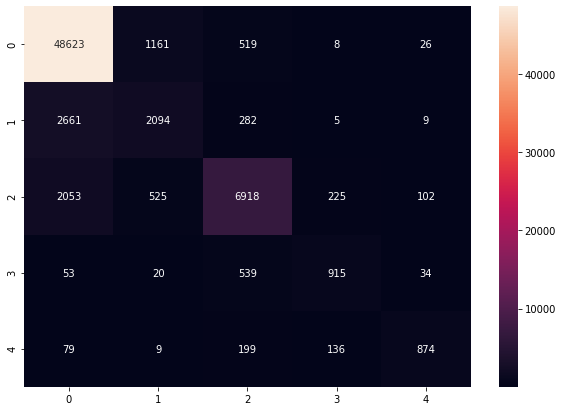

In [12]:
df_cm = pd.DataFrame(confusion_matrix(df.real, df.predicted), index = [i for i in "01234"],
                  columns = [i for i in "01234"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  fmt='g')

### Problems:

1. More than 50% of Grade 1 is being predicted as Grade 0
2. A significant Grade 2 is being predicted as Grade 0
3. Check images from Grade 0 being predicted as Grade 4
4. Check images from Grade 4 being predicted as Grade 0
5. Check images from Grade 2, 3 being predicted as Grade 0

## 4 is being predicted as Grade 0. Why?

In [13]:
df_4_0 = df[(df.real==4) & (df.predicted==0)]

In [14]:
df_4_0

path  real      0      1  \
66794  ../input/drunstratified/content/non_stratified...     4  45.47   0.00   
66846  ../input/drunstratified/content/non_stratified...     4  65.46   0.00   
66852  ../input/drunstratified/content/non_stratified...     4  39.09   4.46   
66860  ../input/drunstratified/content/non_stratified...     4  40.13   0.00   
66872  ../input/drunstratified/content/non_stratified...     4  33.67  24.02   
...                                                  ...   ...    ...    ...   
67982  ../input/drunstratified/content/non_stratified...     4  38.21  20.64   
67998  ../input/drunstratified/content/non_stratified...     4  51.19   0.73   
68018  ../input/drunstratified/content/non_stratified...     4  41.57  20.90   
68021  ../input/drunstratified/content/non_stratified...     4  42.22  32.08   
68037  ../input/drunstratified/content/non_stratified...     4  30.46  15.81   

           2      3      4  predicted  difference  
66794  13.78   2.02  38.73          0        6.74  
66846   5.24   5.34  23.97          0       41.49  
66852  18.87   0.00  37.57          0        1.52  
66860  20.10   3.40  36.37          0        3.76  
66872  28.16  14.16   0.00          0        5.51  
...      ...    ...    ...        ...         ...  
67982  30.85   0.00  10.30          0        7.36  
67998   7.79   0.00  40.29          0       10.90  
68018  14.10   0.00  23.43          0       18.14  
68021  25.59   0.00   0.12          0       10.14  
68037  23.42   0.00  30.32          0        0.14  

[79 rows x 9 columns]

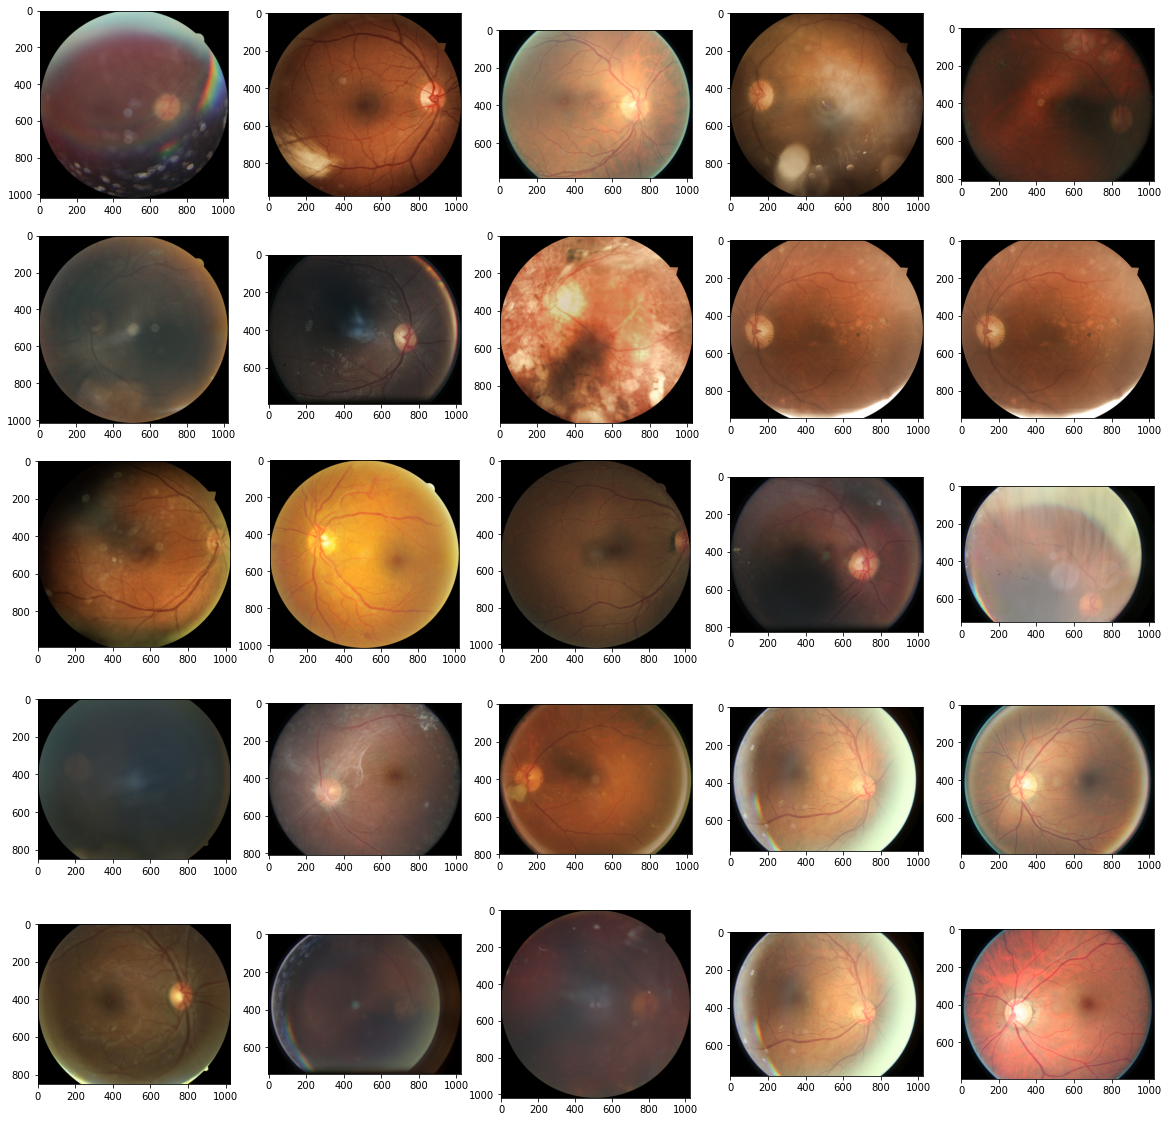

In [15]:
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = np.array(Image.open(df_4_0.sample().path.iloc[0]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### 0 is being predicted as Grade 4. Why?

In [16]:
df_0_4 = df[(df.real==0) & (df.predicted==4)]

In [17]:
df_0_4

path  real      0      1  \
1422   ../input/drunstratified/content/non_stratified...     0  32.65  12.29   
8428   ../input/drunstratified/content/non_stratified...     0  31.25   0.00   
10228  ../input/drunstratified/content/non_stratified...     0  31.32  13.51   
14972  ../input/drunstratified/content/non_stratified...     0  16.17   0.00   
17789  ../input/drunstratified/content/non_stratified...     0  28.45   0.00   
18046  ../input/drunstratified/content/non_stratified...     0  33.61  17.66   
19357  ../input/drunstratified/content/non_stratified...     0  33.78   0.00   
23228  ../input/drunstratified/content/non_stratified...     0  32.80   0.00   
23800  ../input/drunstratified/content/non_stratified...     0  23.41  25.71   
25167  ../input/drunstratified/content/non_stratified...     0  29.21  15.05   
27772  ../input/drunstratified/content/non_stratified...     0  29.62  11.95   
30536  ../input/drunstratified/content/non_stratified...     0  23.28   0.00   
31852  ../input/drunstratified/content/non_stratified...     0  33.23  10.59   
32513  ../input/drunstratified/content/non_stratified...     0  26.60  19.91   
32832  ../input/drunstratified/content/non_stratified...     0  36.62   0.00   
33965  ../input/drunstratified/content/non_stratified...     0   0.00   1.96   
35252  ../input/drunstratified/content/non_stratified...     0  37.15   4.93   
35383  ../input/drunstratified/content/non_stratified...     0  30.31   0.00   
37347  ../input/drunstratified/content/non_stratified...     0  34.22   0.00   
38568  ../input/drunstratified/content/non_stratified...     0  32.30  16.62   
40391  ../input/drunstratified/content/non_stratified...     0  34.48  10.79   
44061  ../input/drunstratified/content/non_stratified...     0  20.49   0.00   
45351  ../input/drunstratified/content/non_stratified...     0  28.56  30.20   
45457  ../input/drunstratified/content/non_stratified...     0  27.68   9.75   
47996  ../input/drunstratified/content/non_stratified...     0  38.76   9.64   
48949  ../input/drunstratified/content/non_stratified...     0  12.20   0.00   

           2      3      4  predicted  difference  
1422   20.80   0.00  34.26          4        1.61  
8428    9.83   2.77  56.16          4       24.91  
10228  12.00   0.00  43.18          4       11.86  
14972  26.75  21.33  35.74          4        8.99  
17789  14.56   1.47  55.52          4       27.07  
18046  14.85   0.00  33.88          4        0.27  
19357  16.33  10.99  38.90          4        5.12  
23228   9.57  19.88  37.75          4        4.95  
23800   9.31   0.00  41.57          4       15.86  
25167  26.50   0.00  29.24          4        0.03  
27772  16.42   0.00  42.02          4       12.40  
30536  22.33   9.49  44.90          4       21.62  
31852  20.24   0.00  35.94          4        2.71  
32513  26.35   0.00  27.14          4        0.54  
32832   0.55   6.29  56.54          4       19.92  
33965  31.34  29.13  37.57          4        6.23  
35252  10.98   0.00  46.94          4        9.79  
35383  17.36   5.85  46.48          4       16.17  
37347   5.95   7.59  52.24          4       18.02  
38568  18.54   0.00  32.54          4        0.24  
40391  15.20   0.00  39.52          4        5.04  
44061  31.72  11.08  36.70          4        4.98  
45351   3.38   0.00  37.85          4        7.65  
45457   5.02   0.00  57.56          4       29.88  
47996   4.93   0.00  46.67          4        7.91  
48949  27.15  29.99  30.65          4        0.66

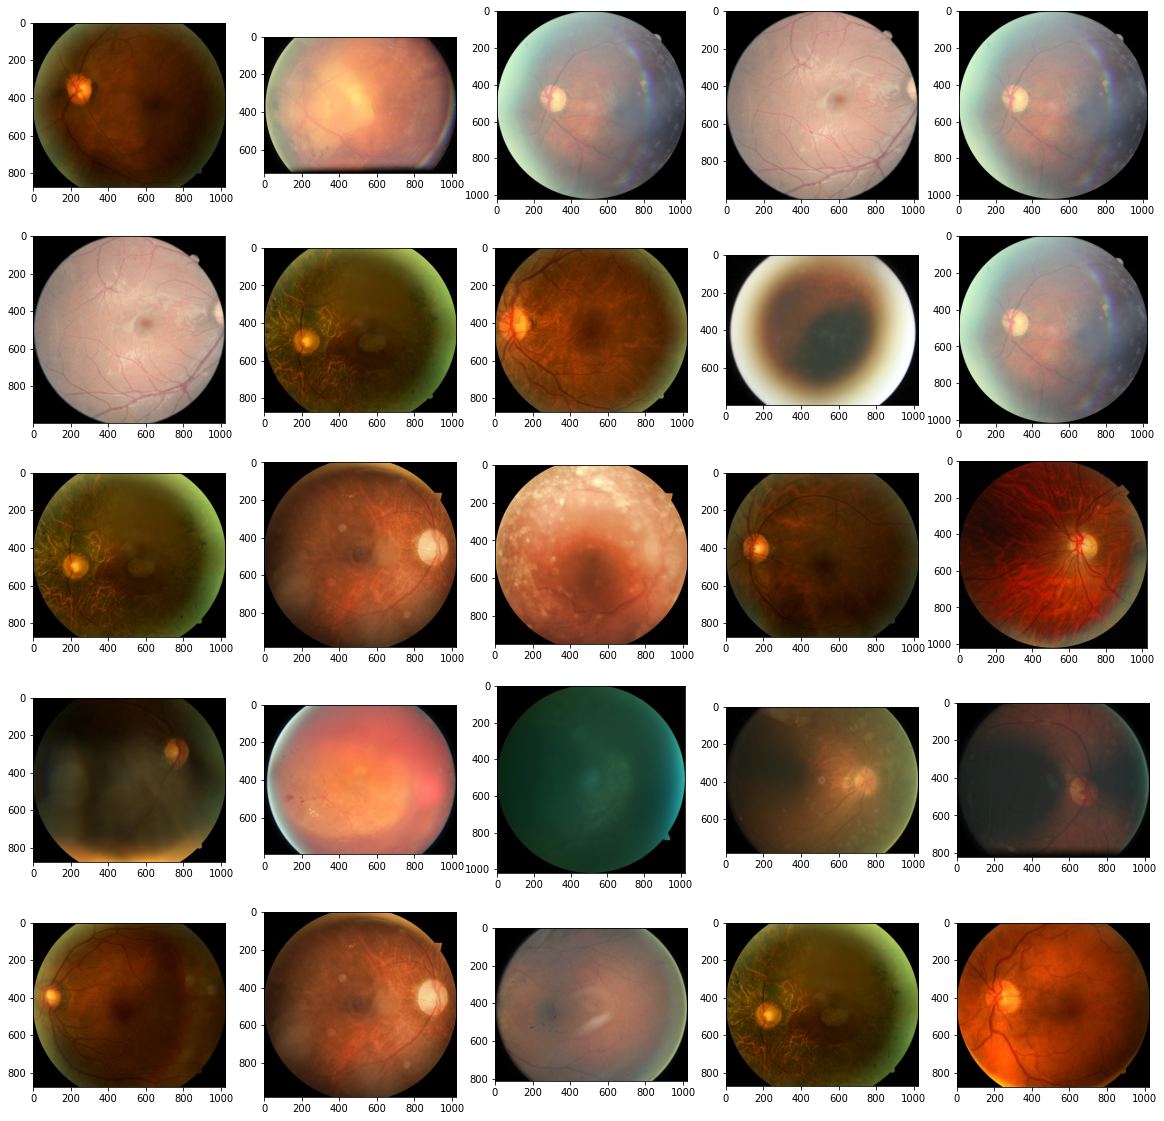

In [18]:
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = np.array(Image.open(df_0_4.sample().path.iloc[0]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### These images are bad. Even an opthalmogist would have a difficult time identifying the difference.

### 1 being predicted as 0

In [19]:
df_1_0 = df[(df.real==1) & (df.predicted==0)]

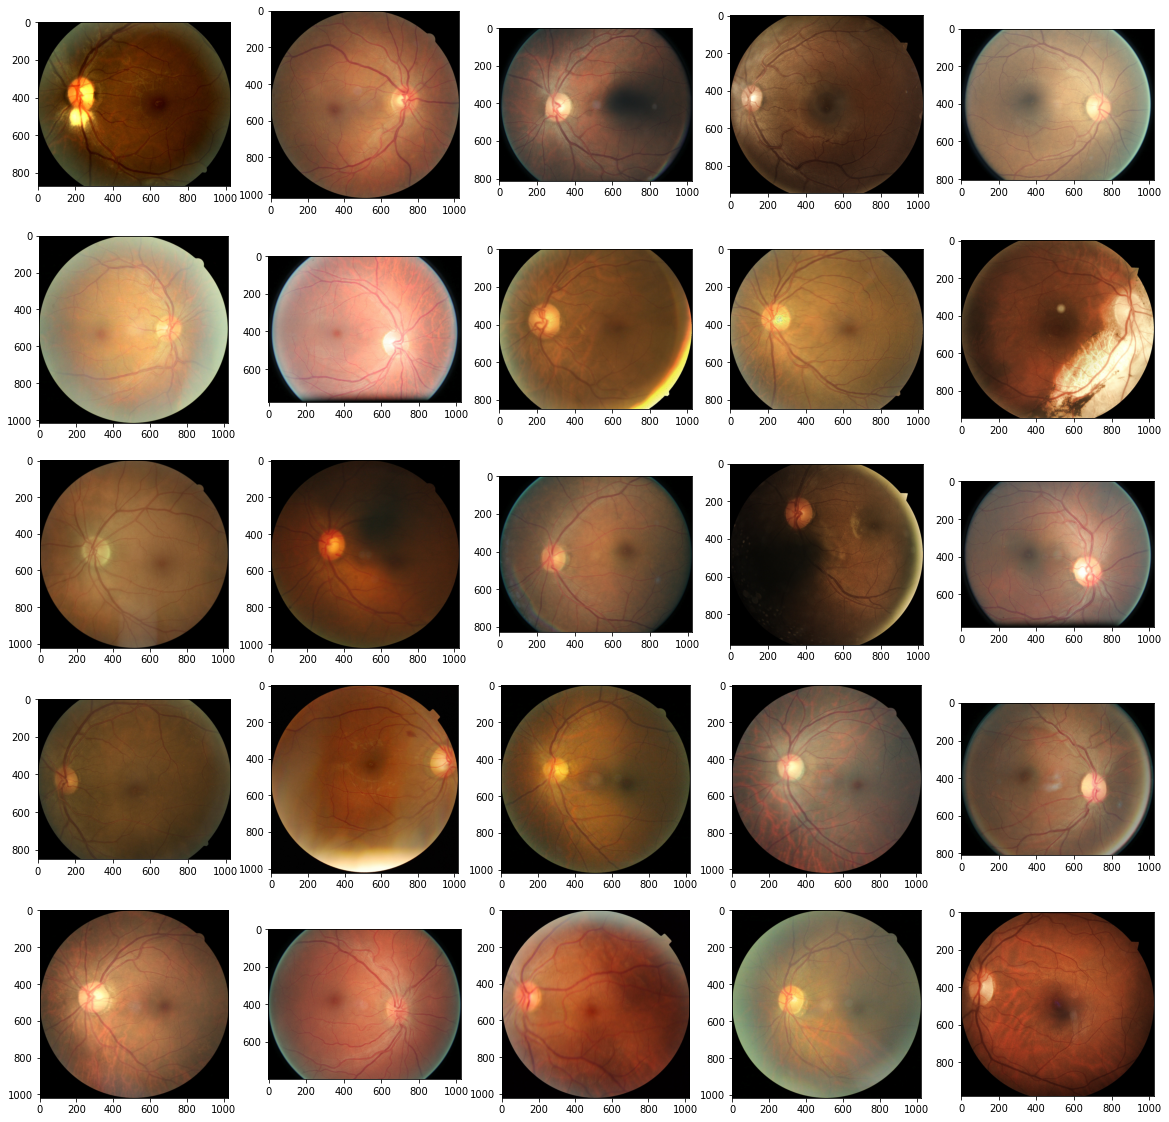

In [20]:
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = np.array(Image.open(df_1_0.sample().path.iloc[0]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [21]:
df_0_1 = df[(df.real==0) & (df.predicted==1)]

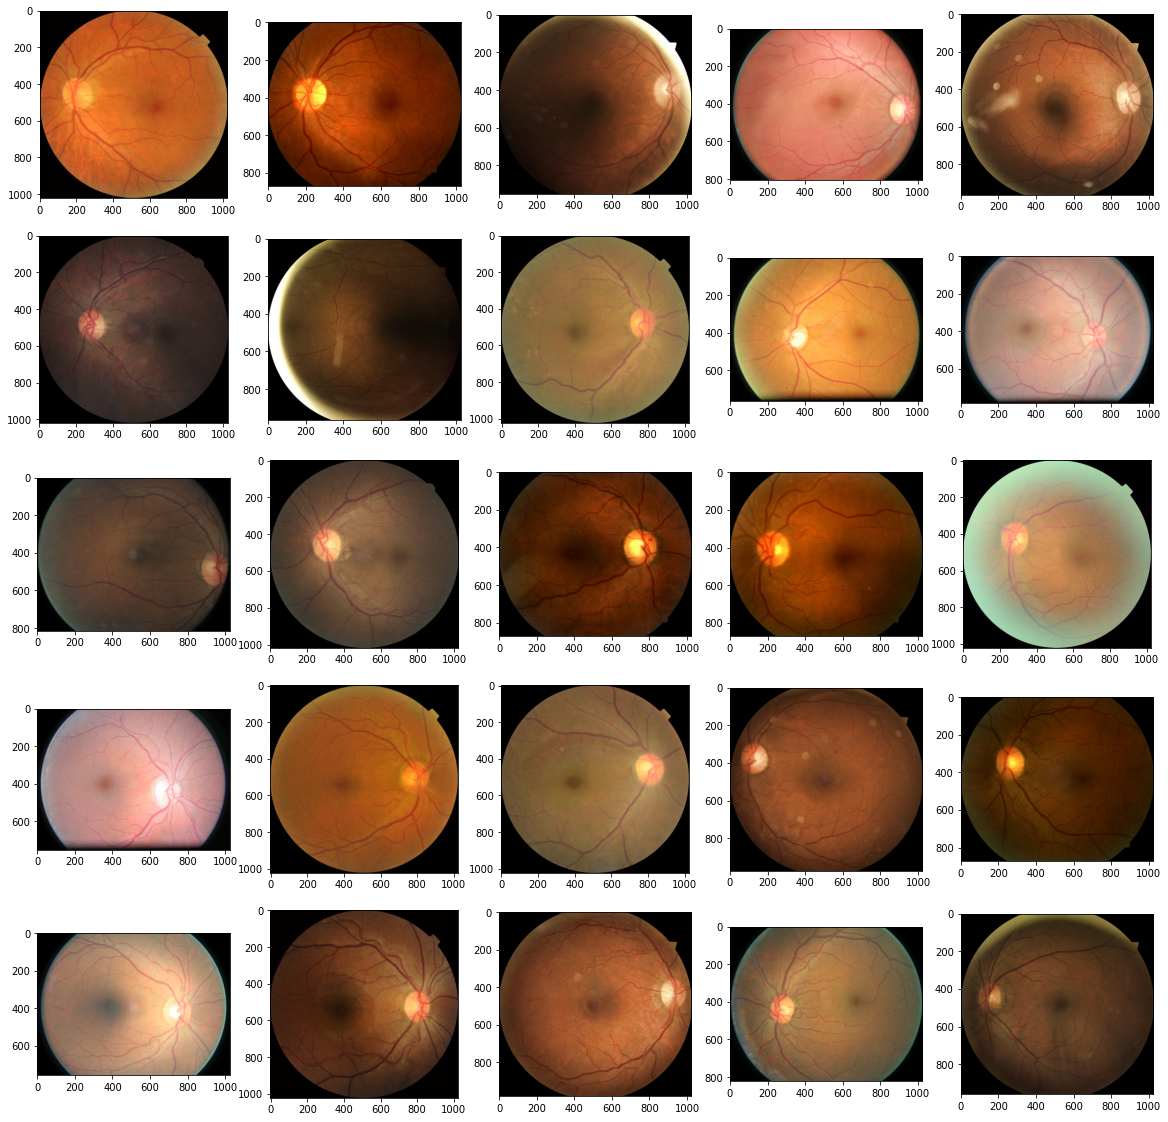

In [22]:
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = np.array(Image.open(df_0_1.sample().path.iloc[0]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### Unsure images

In [23]:
df[(df.max(axis=1)<30) & (df.real==df.predicted)]

path  real      0      1  \
881    ../input/drunstratified/content/non_stratified...     0  29.11  28.57   
918    ../input/drunstratified/content/non_stratified...     0  28.12  25.17   
11861  ../input/drunstratified/content/non_stratified...     0  27.97  26.94   
21419  ../input/drunstratified/content/non_stratified...     0  29.40  16.88   
22769  ../input/drunstratified/content/non_stratified...     0  29.11  28.22   
25650  ../input/drunstratified/content/non_stratified...     0  27.85  23.26   
27831  ../input/drunstratified/content/non_stratified...     0  28.77  28.07   
31008  ../input/drunstratified/content/non_stratified...     0  29.52  27.82   
35729  ../input/drunstratified/content/non_stratified...     0  27.81  25.31   
51207  ../input/drunstratified/content/non_stratified...     1  25.06  28.73   
53530  ../input/drunstratified/content/non_stratified...     1  23.31  29.13   
55758  ../input/drunstratified/content/non_stratified...     2   0.00  17.96   
55767  ../input/drunstratified/content/non_stratified...     2  22.33  24.13   
56414  ../input/drunstratified/content/non_stratified...     2  29.07  22.58   
57506  ../input/drunstratified/content/non_stratified...     2  26.25  23.66   
57596  ../input/drunstratified/content/non_stratified...     2  26.81  22.57   
58427  ../input/drunstratified/content/non_stratified...     2  27.41  20.94   
58496  ../input/drunstratified/content/non_stratified...     2  28.34  15.05   
59541  ../input/drunstratified/content/non_stratified...     2  27.44   0.00   
61220  ../input/drunstratified/content/non_stratified...     2  27.10  29.65   
61918  ../input/drunstratified/content/non_stratified...     2  26.76  29.20   
62110  ../input/drunstratified/content/non_stratified...     2  27.96  24.85   
62354  ../input/drunstratified/content/non_stratified...     2  27.89  29.72   
64166  ../input/drunstratified/content/non_stratified...     2  29.06   0.00   
64419  ../input/drunstratified/content/non_stratified...     2   0.00  26.10   
64556  ../input/drunstratified/content/non_stratified...     2  24.47  22.58   
64591  ../input/drunstratified/content/non_stratified...     2  28.09  18.31   
65313  ../input/drunstratified/content/non_stratified...     3  24.35  24.22   
65890  ../input/drunstratified/content/non_stratified...     3  24.84  22.02   
66394  ../input/drunstratified/content/non_stratified...     3  18.11   0.00   
66470  ../input/drunstratified/content/non_stratified...     3   0.00  17.14   

           2      3      4  predicted  difference  
881    29.03  13.29   0.00          0        0.08  
918    18.89   0.00  27.82          0        0.30  
11861  27.37  17.72   0.00          0        0.60  
21419  26.32   0.00  27.41          0        1.99  
22769  25.67  17.00   0.00          0        0.89  
25650  21.46  27.43   0.00          0        0.42  
27831  28.53  14.62   0.00          0        0.24  
31008  26.69  15.97   0.00          0        1.70  
35729  26.42  20.47   0.00          0        1.39  
51207  28.38  17.83   0.00          1        0.35  
53530  26.41  21.16   0.00          1        2.72  
55758  29.53  26.37  26.14          2        3.16  
55767  29.66  23.88   0.00          2        5.53  
56414  29.12  19.22   0.00          2        0.05  
57506  28.67  21.42   0.00          2        2.42  
57596  29.94  20.68   0.00          2        3.13  
58427  27.95  23.70   0.00          2        0.54  
58496  29.26   0.00  27.35          2        0.92  
59541  29.23  24.37  18.96          2        1.79  
61220  29.70  13.55   0.00          2        0.05  
61918  29.86  14.18   0.00          2        0.66  
62110  29.79  17.40   0.00          2        1.83  
62354  29.87  12.52   0.00          2        0.15  
64166  29.70  29.67  11.57          2        0.03  
64419  29.49  20.77  23.63          2        3.39  
64556  28.38  24.56   0.00          2        3.82  
64591  28.36   0.00  25.24          2        0.27  
65313  23.51  27.92   0.00         

In [25]:
df[df.difference>10]

path  real      0      1  \
1      ../input/drunstratified/content/non_stratified...     0  43.60  27.91   
2      ../input/drunstratified/content/non_stratified...     0  46.30  29.55   
3      ../input/drunstratified/content/non_stratified...     0  50.46  26.26   
4      ../input/drunstratified/content/non_stratified...     0  42.10  30.81   
5      ../input/drunstratified/content/non_stratified...     0  39.38  24.52   
...                                                  ...   ...    ...    ...   
68063  ../input/drunstratified/content/non_stratified...     4  13.65   0.00   
68065  ../input/drunstratified/content/non_stratified...     4   0.00   5.71   
68066  ../input/drunstratified/content/non_stratified...     4   9.30   0.00   
68067  ../input/drunstratified/content/non_stratified...     4   0.00   5.98   
68068  ../input/drunstratified/content/non_stratified...     4   0.00   7.67   

           2      3      4  predicted  difference  
1      22.77   5.72   0.00          0       15.69  
2      22.92   1.23   0.00          0       16.75  
3      20.61   2.67   0.00          0       24.20  
4      16.89   0.00  10.19          0       11.29  
5      29.13   6.98   0.00          0       10.25  
...      ...    ...    ...        ...         ...  
68063  17.52   4.88  63.95          4       46.43  
68065  41.79  26.84  25.66          2       14.95  
68066  49.98  27.63  13.10          2       22.35  
68067  24.43  17.16  52.42          4       27.99  
68068  24.85  11.68  55.81          4       30.96  

[51540 rows x 9 columns]

In [26]:
df["difference"].describe()

count    68069.000000
mean        16.080393
std          9.065169
min          0.000000
25%         10.210000
50%         15.710000
75%         20.670000
max         95.340000
Name: difference, dtype: float64

In [27]:
df[df.real==df.predicted]["difference"].describe()

count    59424.000000
mean        17.019999
std          8.799485
min          0.000000
25%         11.580000
50%         16.480000
75%         21.210000
max         95.340000
Name: difference, dtype: float64

In [28]:
u_0 = df[(df.real!=df.predicted) & (df['difference']>5)]

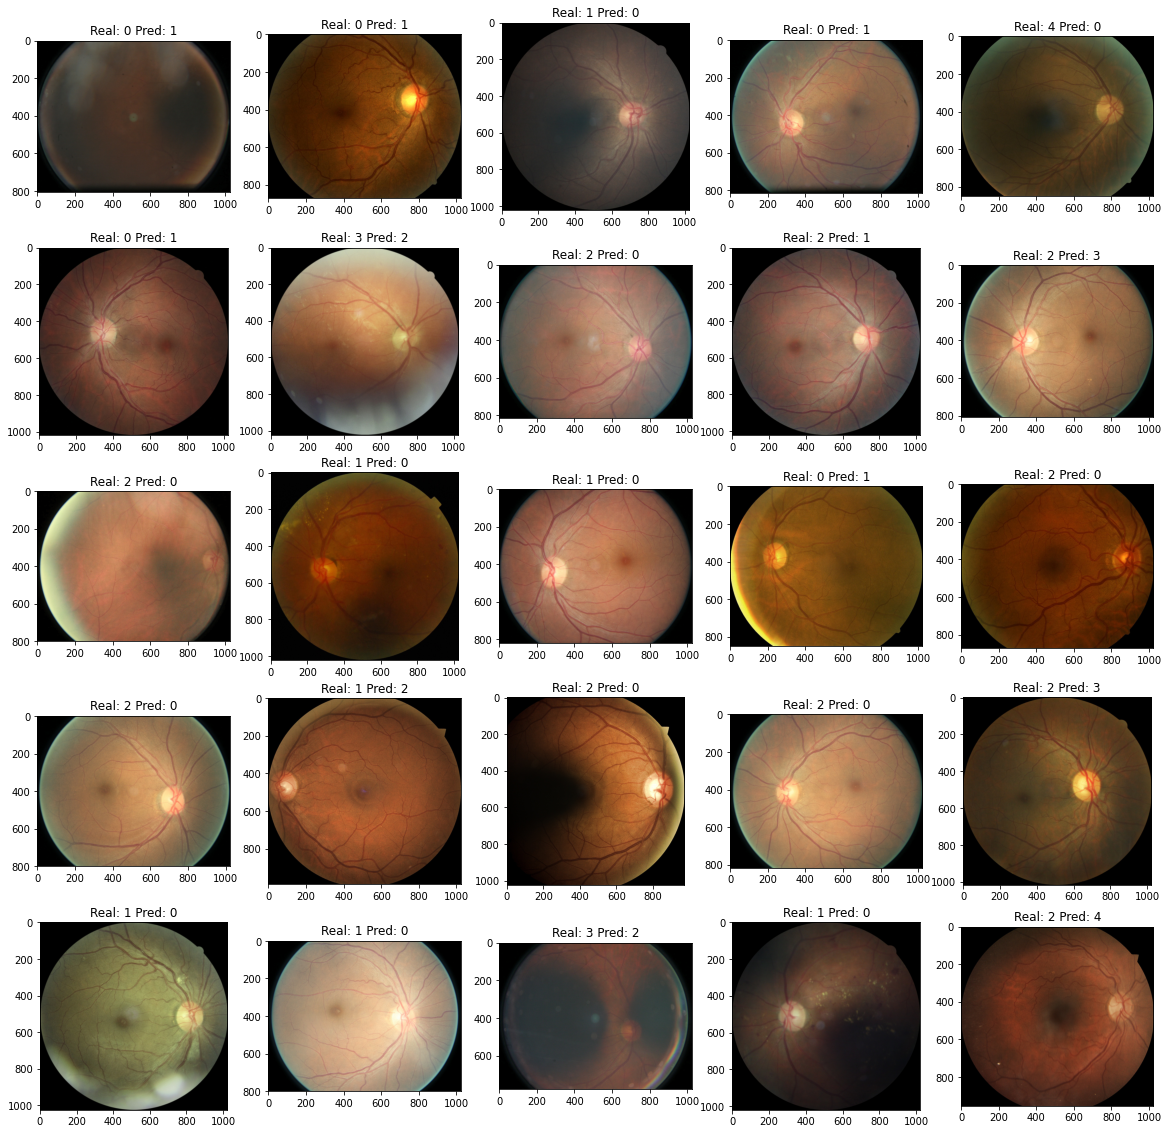

In [29]:
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    rand_img = u_0.sample()
    path = rand_img.path.iloc[0]
    title = "Real: "+str(rand_img.real.iloc[0])+" Pred: "+str(rand_img.predicted.iloc[0])
    img = np.array(Image.open(u_0.sample().path.iloc[0]))
    fig.add_subplot(rows, columns, i, title=title)
    plt.imshow(img)
plt.show()